## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydlm import dlm, trend, seasonality, dynamic
from pathlib import Path
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use("ggplot")

## Data

In [2]:
PATH_DATA = Path("../Data")

In [3]:
df = pd.read_csv(PATH_DATA / "h2weekly.csv", parse_dates=["Date"])

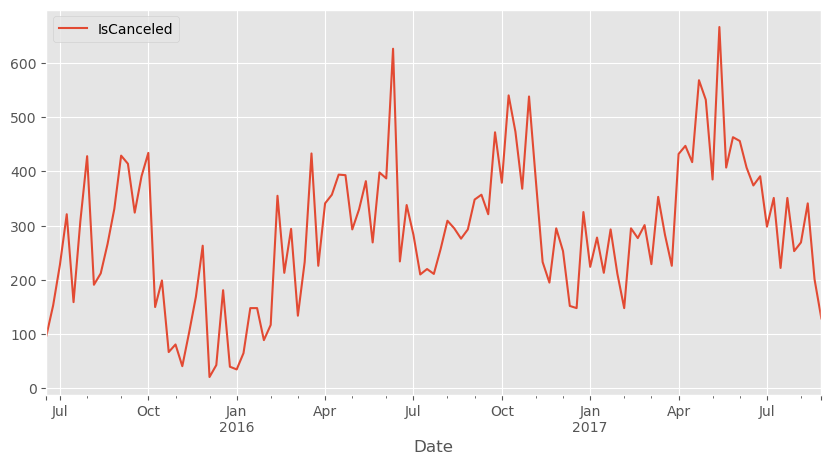

In [4]:
df.plot(x="Date", y="IsCanceled", figsize=(10, 5));

## Simple Model

In [5]:
n_train = int(len(df) * 0.8)
train = df.iloc[:n_train]
test = df.iloc[n_train:]

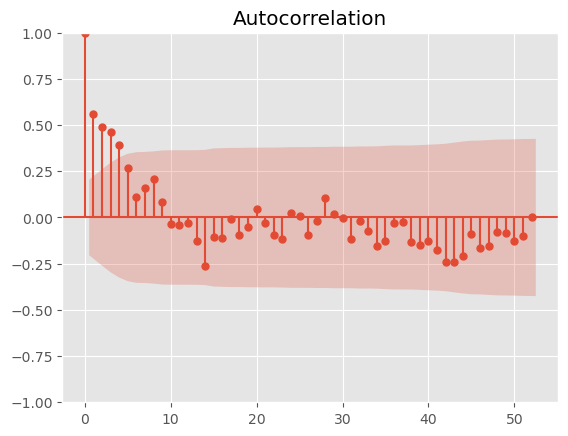

In [6]:
# ACF
plot_acf(train["IsCanceled"], lags=52);

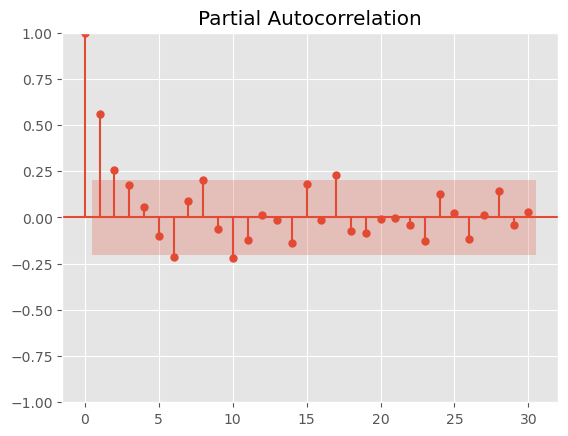

In [7]:
# PACF
plot_pacf(train["IsCanceled"], lags=30);

In [8]:
# Linear trend
linear_trend = trend(degree=1, discount=0.9, name="linear_trend", w=10.0)
# Seasonality
seasonal = seasonality(period=28, discount=0.9, name="seasonal", w=10.0)

# Build a simple dlm
simple_dlm = dlm(train["IsCanceled"]) + linear_trend + seasonal

In [9]:
# Fit the model
simple_dlm.fit()


INFO:pydlm:Initializing models...
INFO:pydlm:Initialization finished.
INFO:pydlm:Starting forward filtering...
INFO:pydlm:Forward filtering completed.
INFO:pydlm:Starting backward smoothing...
INFO:pydlm:Initialization finished.
INFO:pydlm:Starting forward filtering...
INFO:pydlm:Forward filtering completed.
INFO:pydlm:Starting backward smoothing...
INFO:pydlm:Backward smoothing completed.


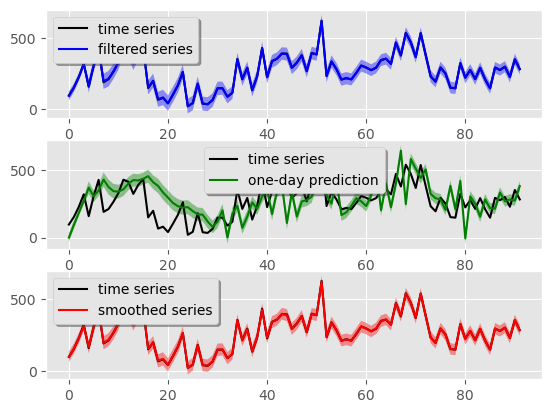

In [10]:
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [13]:
np.sqrt(simple_dlm.getMSE())

128.20569685970787

In [14]:
from pydlm import modelTuner
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(simple_dlm, maxit=100)

INFO:pydlm:Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.
INFO:pydlm:Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


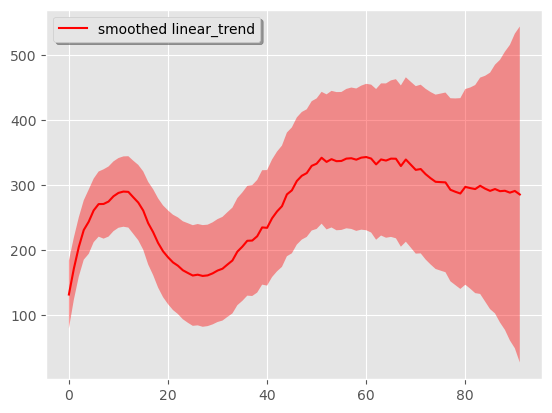

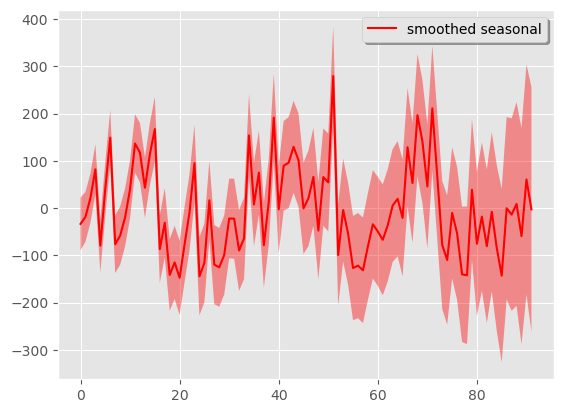

In [16]:
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal')

In [23]:
train.shape, test.shape

((92, 2), (23, 2))

In [29]:
# Last date
train.iloc[-1]

Date          2017-03-19 00:00:00
IsCanceled                    283
Name: 91, dtype: object

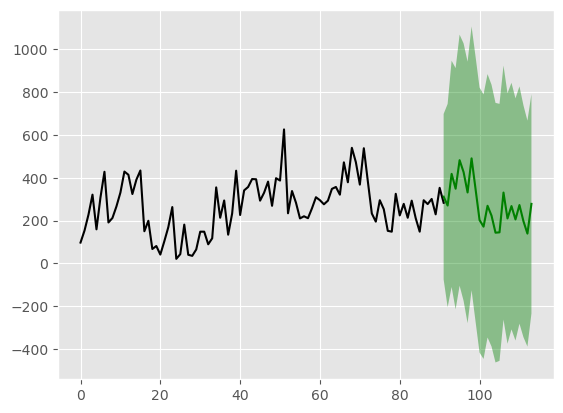

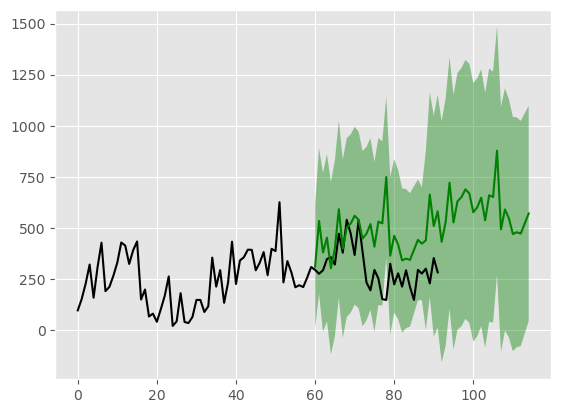

In [ ]:
# Plotted prediction for the first 91 weeks, with a forecast generated for the following 23 weeks.
simple_dlm.plotPredictN(date=91, N=23)
# Plotted prediction for the first 60 weeks, with a forecast generated for the following 55 weeks.
simple_dlm.plotPredictN(date=60, N=55)

In [31]:
a = simple_dlm.predictN(date=91, N=23)
a

([311.64605299589687,
  270.140954582625,
  418.29360074264275,
  348.7543369181791,
  482.23985882260405,
  426.3652400155904,
  331.3526743591832,
  490.6709180775174,
  346.8510575337129,
  202.2779296860855,
  171.48132681755283,
  269.0098439740323,
  222.98835636822034,
  143.2910473675149,
  144.8869708263338,
  330.84346827864067,
  209.84603627551746,
  267.6609610519374,
  205.32567965981465,
  272.47574760192794,
  196.87998738040437,
  139.030061622461,
  277.9534929863966],
 [38945.54378162566,
  58671.831927327235,
  72762.17873043075,
  82696.64855971407,
  89568.08276406655,
  94187.30696380041,
  97150.6992297475,
  98891.39683417957,
  99719.2608903501,
  99852.04110239084,
  99439.51035673993,
  98582.00353124557,
  97344.54332403347,
  95767.52568060356,
  93874.75883584665,
  91679.49857825921,
  89188.99450181935,
  86407.95566890993,
  83341.26630577684,
  79996.29223437919,
  76385.10002498583,
  72536.14061216217,
  68439.9659758564])

In [36]:
a = np.array(a)
b = a[0]
b

array([311.646053  , 270.14095458, 418.29360074, 348.75433692,
       482.23985882, 426.36524002, 331.35267436, 490.67091808,
       346.85105753, 202.27792969, 171.48132682, 269.00984397,
       222.98835637, 143.29104737, 144.88697083, 330.84346828,
       209.84603628, 267.66096105, 205.32567966, 272.4757476 ,
       196.87998738, 139.03006162, 277.95349299])

In [37]:
np.mean(test["IsCanceled"])

373.30434782608694

In [38]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [39]:
rmse(b, test["IsCanceled"])

136.24197797726688